# Cluster Scale Transformer

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20, 15)

In [2]:
points = np.concatenate(
    (
        np.random.normal(loc=4_000_00, scale=30_000, size=6000),
        np.random.normal(loc=3_800_00, scale=30_000, size=3000),
        np.random.normal(loc=3_900, scale=200, size=1000),
    )
)

In [3]:
points_with_outliers = np.concatenate(
    (points, [390441 / 2], [0], [1_000_000], [10_000_000])
)

In [4]:
from clusteredtransforms.scale_clustering import ScaleClusterTransformer

In [5]:
m = ScaleClusterTransformer(
    image_lower_cap=-1,
    image_upper_cap=1,
    inter_cluster_uncertainty=0.5,
    cluster_orders_of_magnitude=0.5,
)

In [6]:
m.fit(points_with_outliers)

ScaleClusterTransformer(cluster_orders_of_magnitude=0.5, image_lower_cap=-1,
                        inter_cluster_uncertainty=0.5)

In [7]:
def plot_image_space(lower_pos, upper_pos, transformer):
    num_points = 100000  # Adjust this to change the number of data points
    positions = np.array(
        [
            lower_pos + (upper_pos - lower_pos) * i / (num_points - 1)
            for i in range(num_points)
        ]
    )
    # Calculate the projection
    image_positions = transformer.transform(positions.reshape(-1, 1))

    # Create the plot
    plt.plot(positions, image_positions)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Projective Space")
    plt.grid(True)
    plt.show()

In [8]:
m.clusters_

[Cluster - [min: 0.0, min: 0.0, y_min: -0.9097500000000001, y_max: -0.9097500000000001],
 Cluster - [min: 3263.265921158818, min: 4659.2943561046295, y_min: -0.664651966787859, y_max: -0.3250145346338735],
 Cluster - [min: 195220.5, min: 522804.8153839366, y_min: -0.011810871564434944, y_max: 0.42220194556027146],
 Cluster - [min: 1000000.0, min: 1000000.0, y_min: 0.73540560862971, y_max: 0.73540560862971],
 Cluster - [min: 10000000.0, min: 10000000.0, y_min: 0.766400249278692, y_max: 0.766400249278692]]

# Visualizing the projection space.

From min to max values.

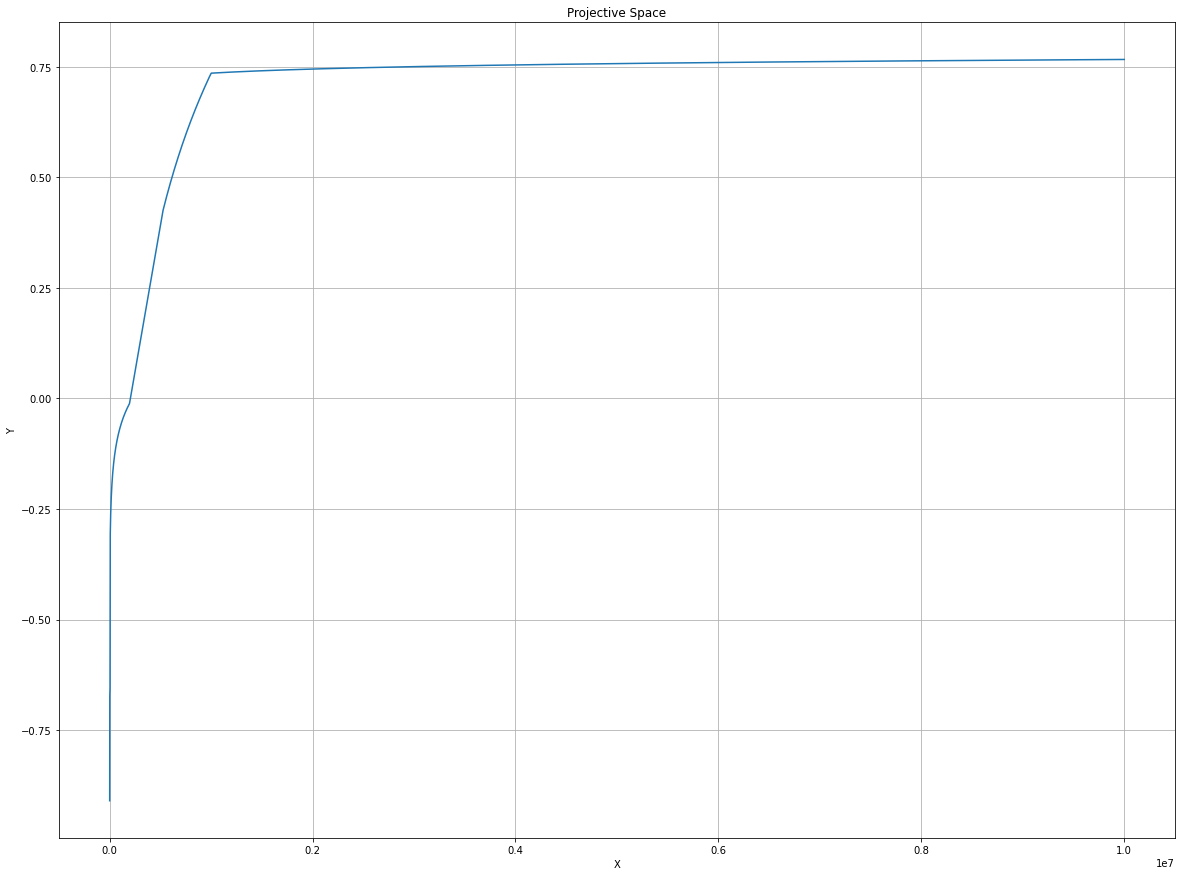

In [9]:
plot_image_space(0, 10_000_000, m)

## Visualizing a region near the lowest point

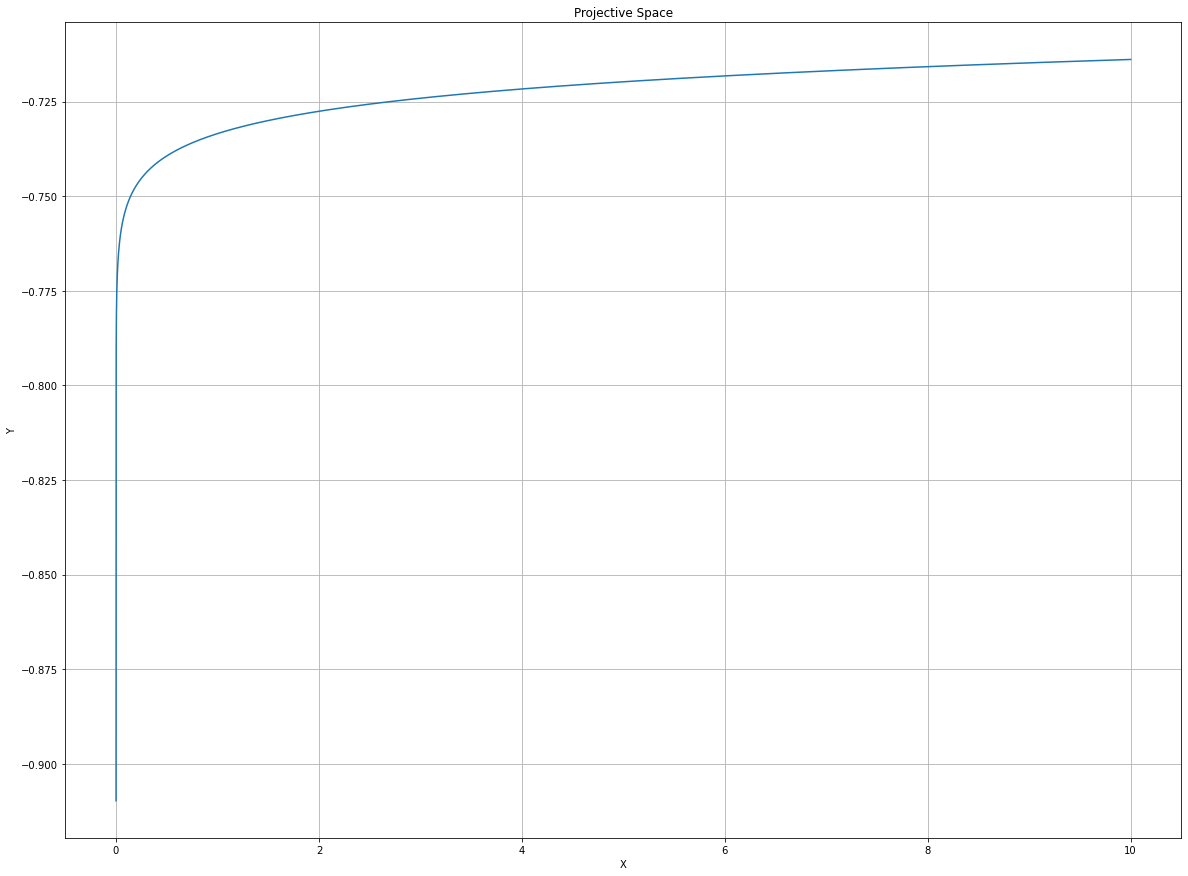

In [10]:
plot_image_space(0, 10, m)

## Visualizing the first real cluster. 

Note how the space is linear within the cluster, and there are logarithmic mappings between the scale clusters.

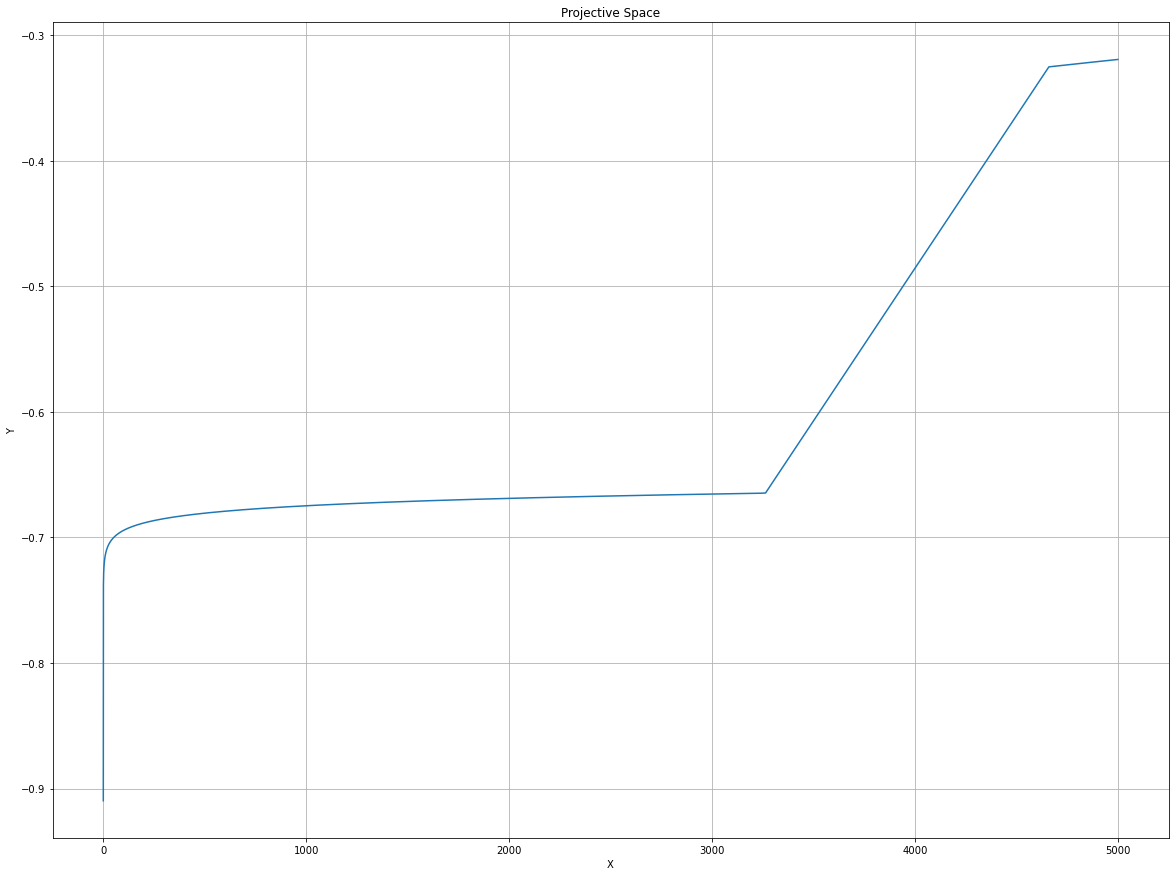

In [11]:
plot_image_space(0, 5_000, m)

## Going up from the first cluster, more logarithmic interpolation.

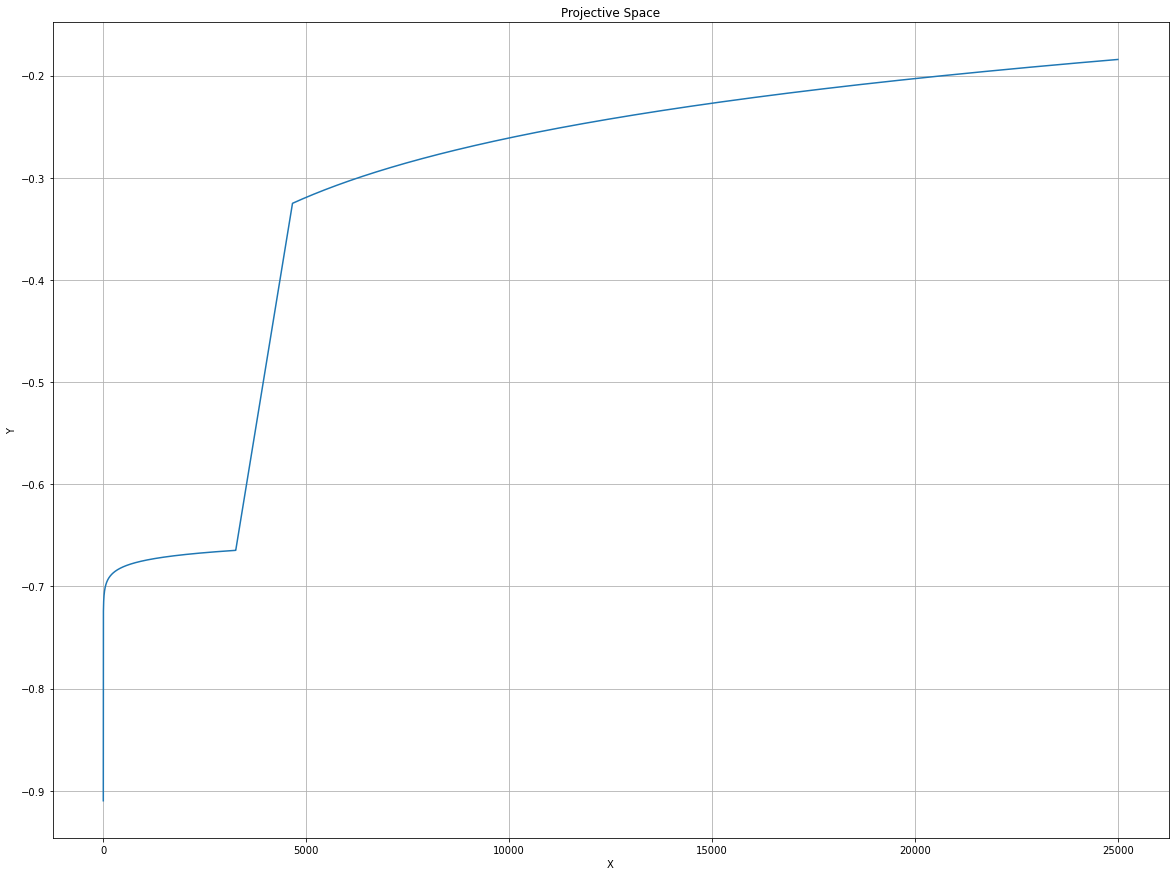

In [12]:
plot_image_space(0, 25_000, m)

## Even more interpolation

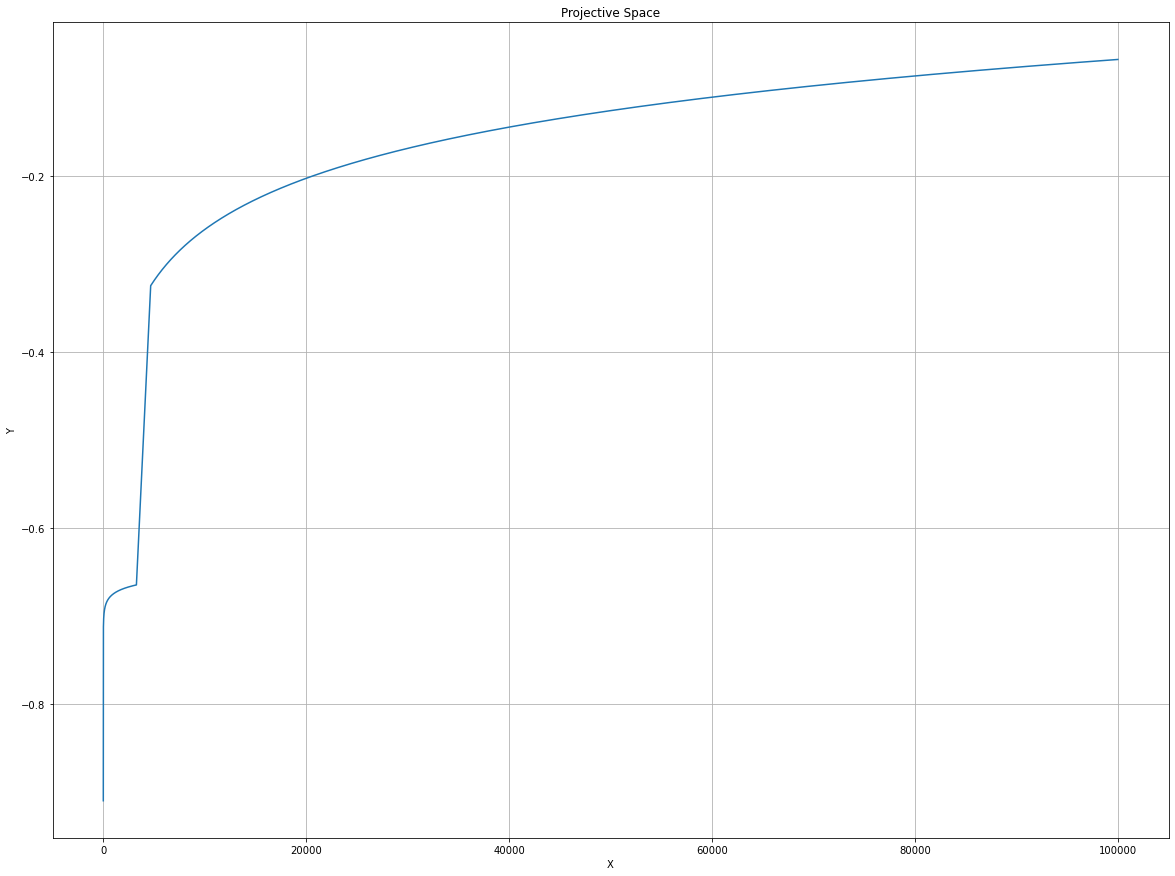

In [13]:
plot_image_space(0, 100_000, m)

## Second cluster now in view.

Note how the first cluster is in the scale of 1k, and the second in the scale of 100k. Therefore, the midpoint between the clusters corresponds to the scale of 10k.

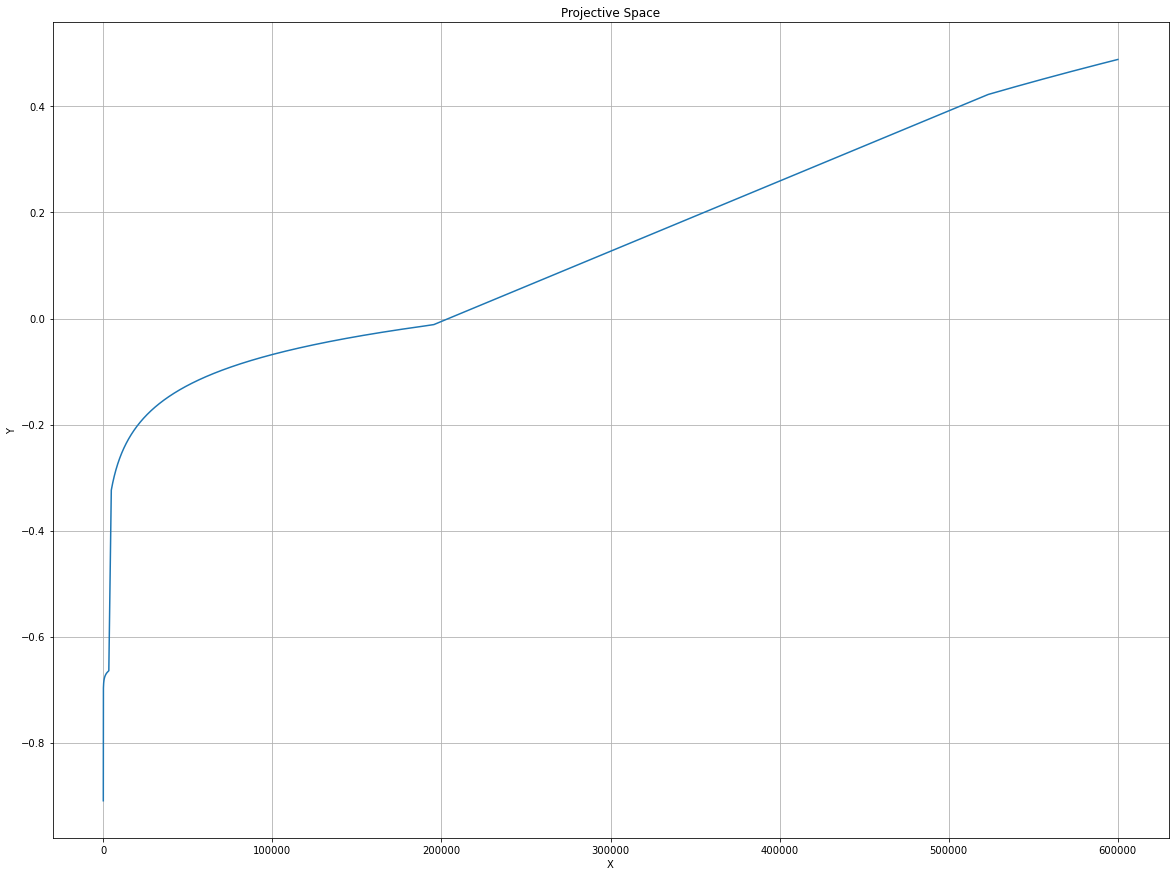

In [14]:
plot_image_space(0, 600_000, m)

## Leaving the second cluster behind, up until the third (singular cluster) in the scale of 1M

Note the different rates of growth.

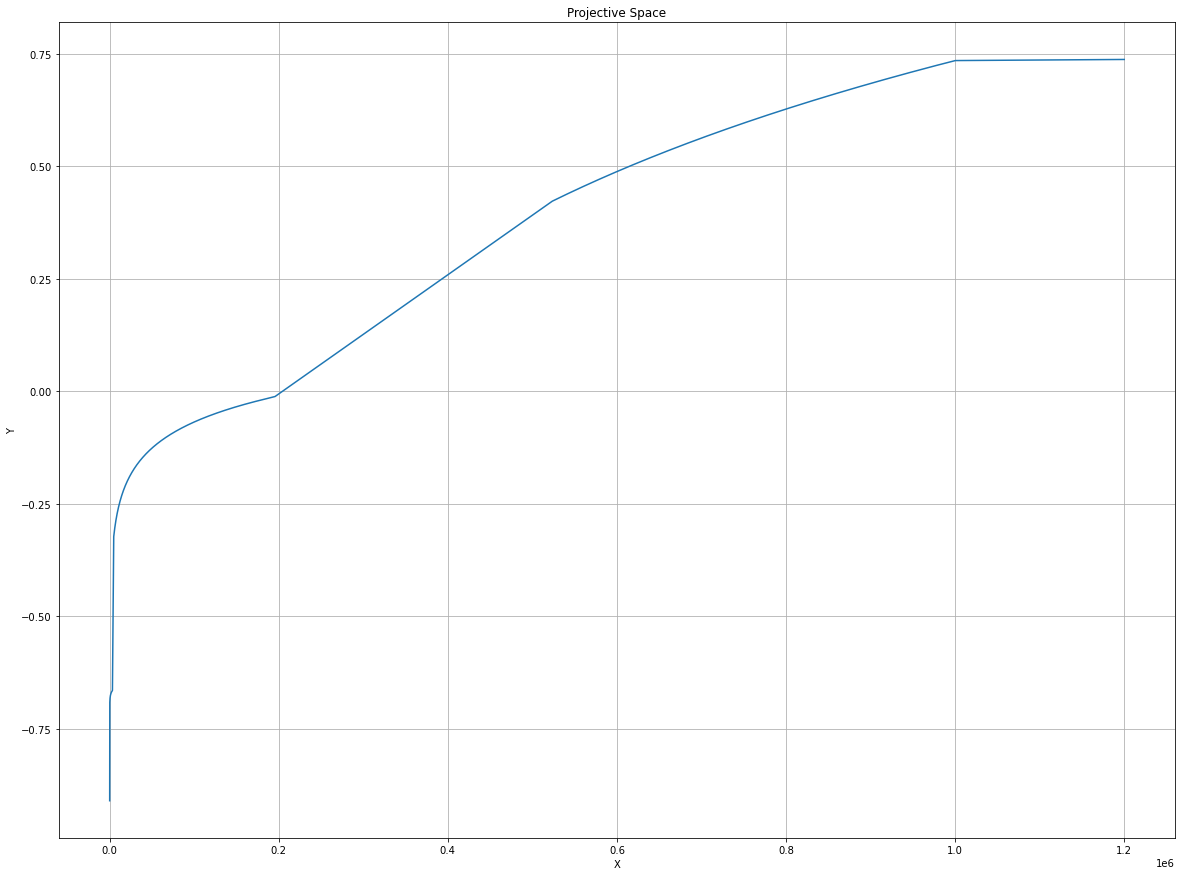

In [15]:
plot_image_space(0, 1_200_000, m)

## Going to the fourth cluster

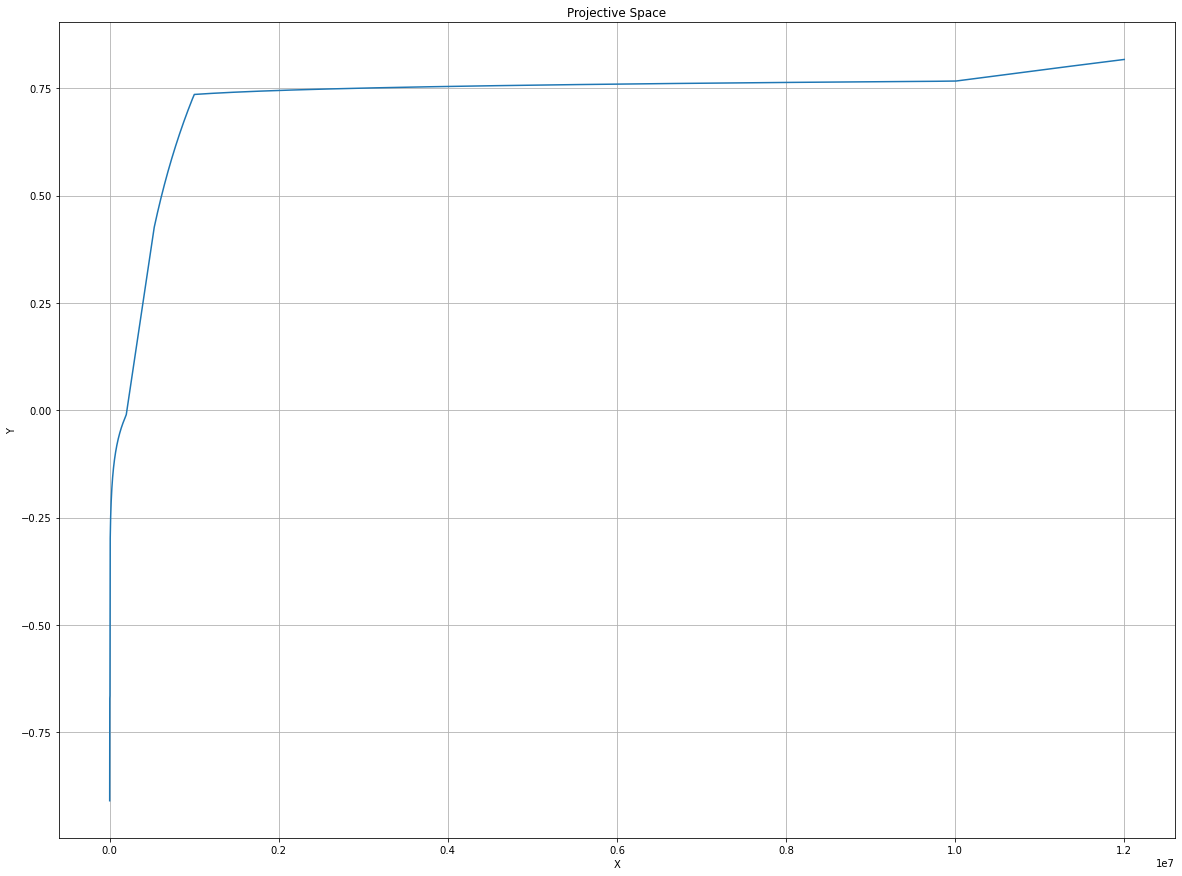

In [16]:
plot_image_space(0, 12_000_000, m)

## And now going far outside the data's original range

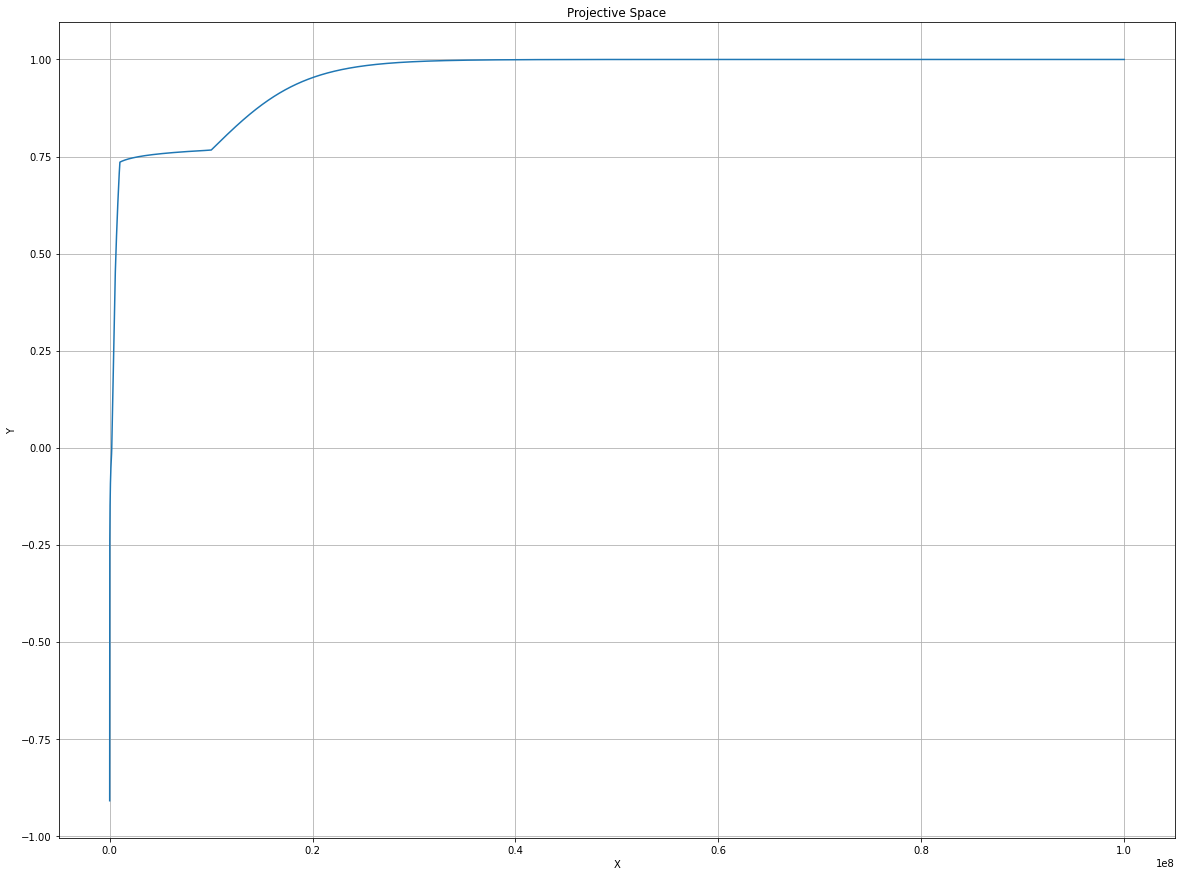

In [17]:
plot_image_space(0, 100_000_000, m)

# Comparison of projective spaces

In [18]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer

# Reshape the 1D array into a 2D array (required for sklearn)
data = np.array(points_with_outliers).reshape(-1, 1)

# Create the RobustScaler and QuantileTransformer objects
robust_scaler = RobustScaler()
quantile_transformer = QuantileTransformer()

# Fit and transform the data using the RobustScaler
robust_scaled_data = robust_scaler.fit_transform(data)

# Fit and transform the data using the QuantileTransformer
quantile_scaled_data = quantile_transformer.fit_transform(data)

# Reshape the scaled data back to 1D arrays
robust_scaled_data = robust_scaled_data.flatten()
quantile_scaled_data = quantile_scaled_data.flatten()

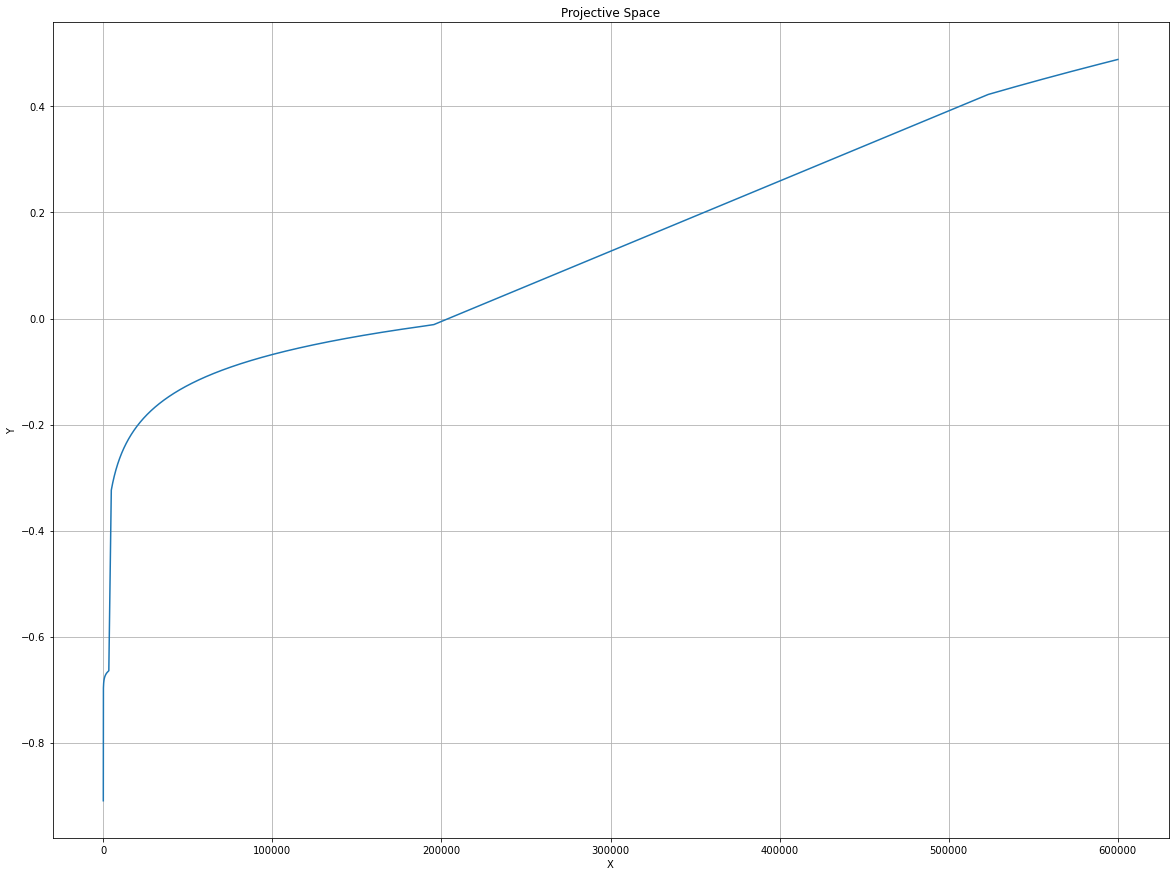

In [19]:
# For the clustered scale transformer
plot_image_space(0, 600_000, m)

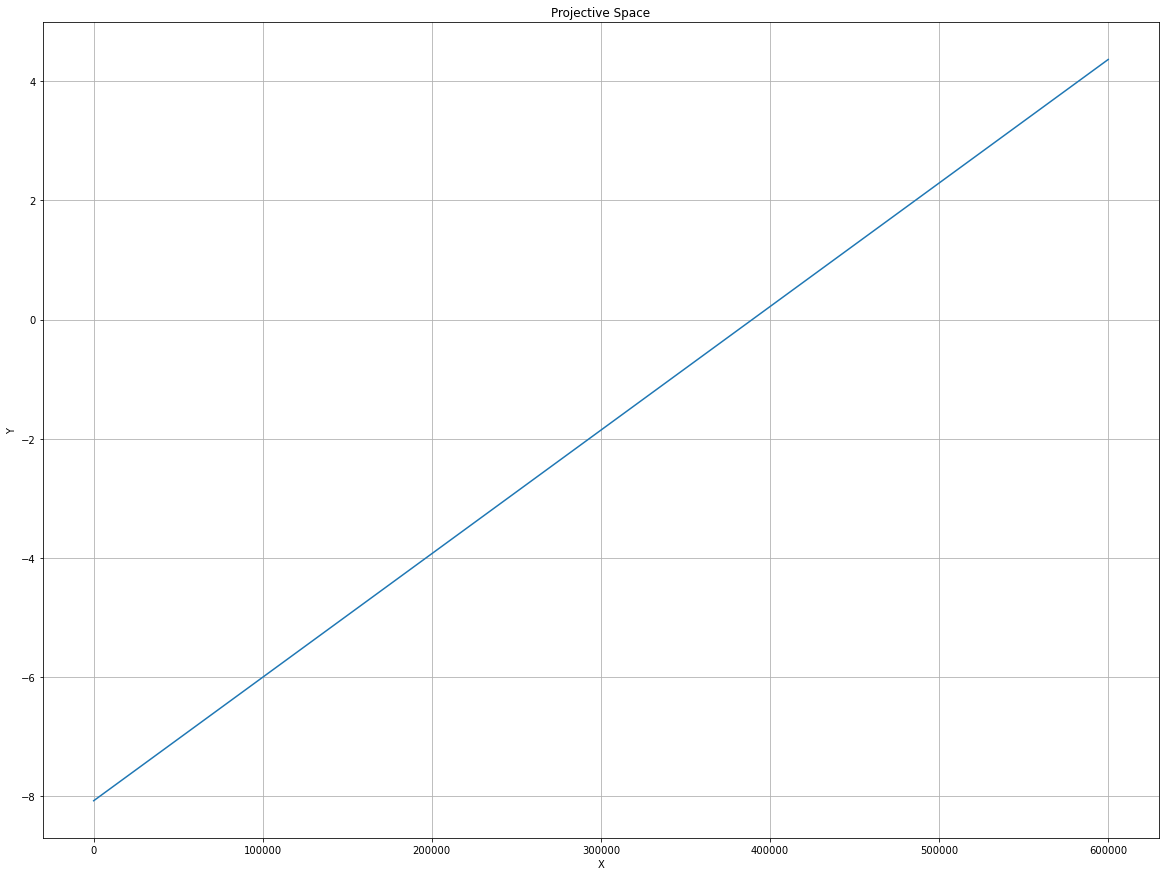

In [20]:
# For the robust scaler
plot_image_space(0, 600_000, robust_scaler)

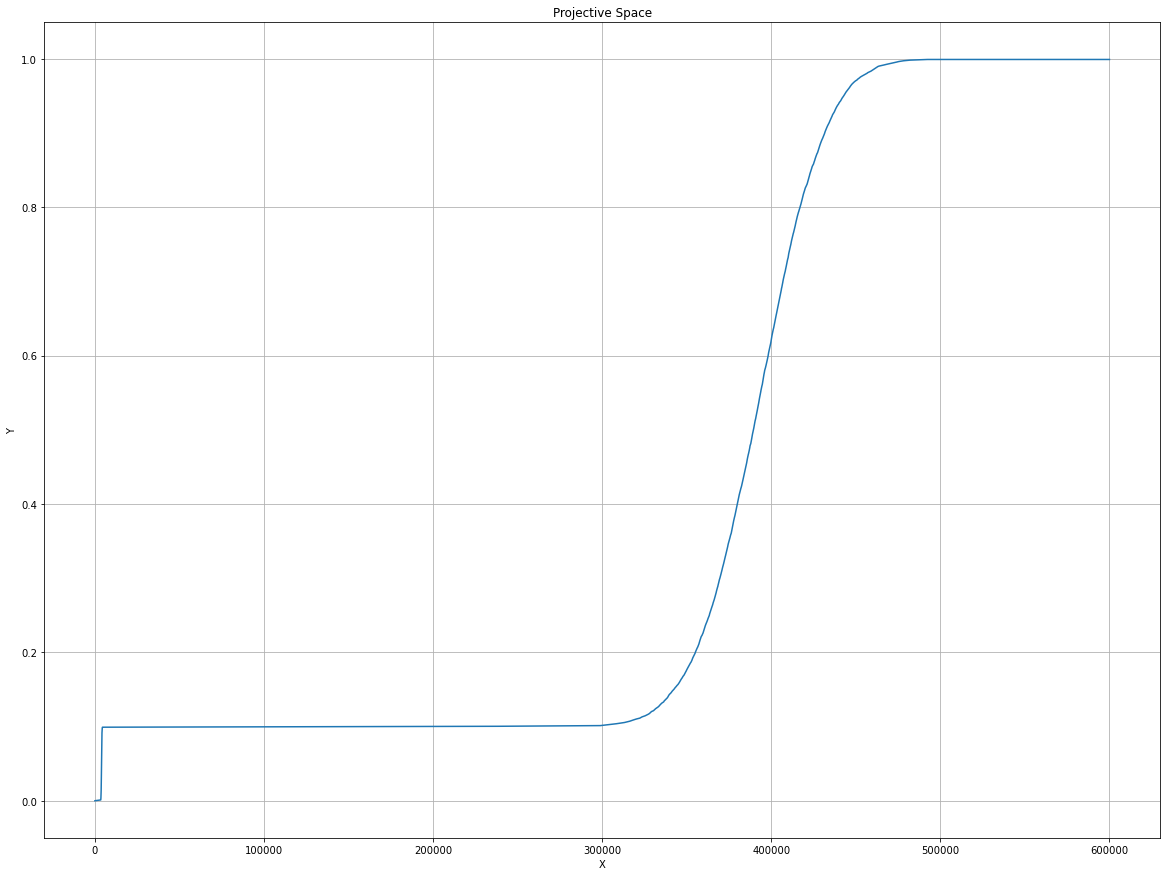

In [21]:
# For the quantile transformer
plot_image_space(0, 600_000, quantile_transformer)

## Checking how points look when in the projected space

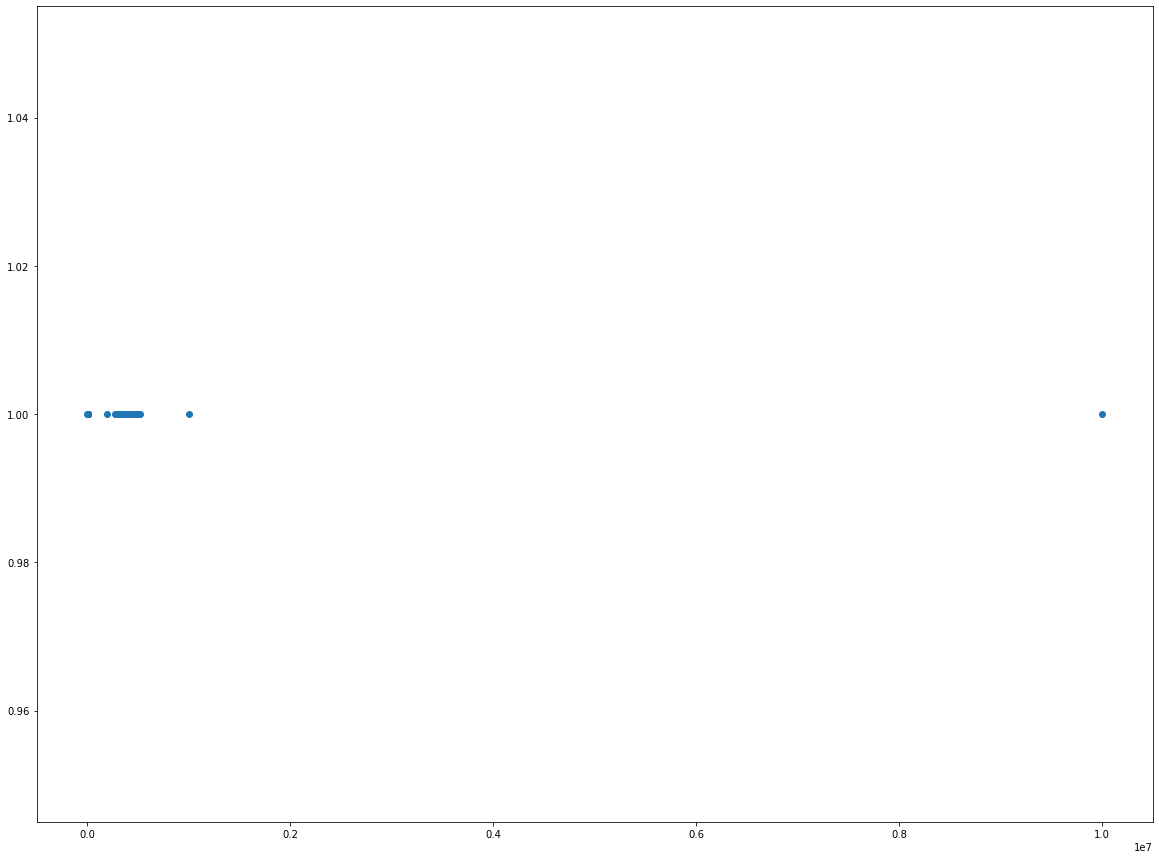

In [22]:
# Original data
plt.scatter(points_with_outliers, [1] * len(points_with_outliers))

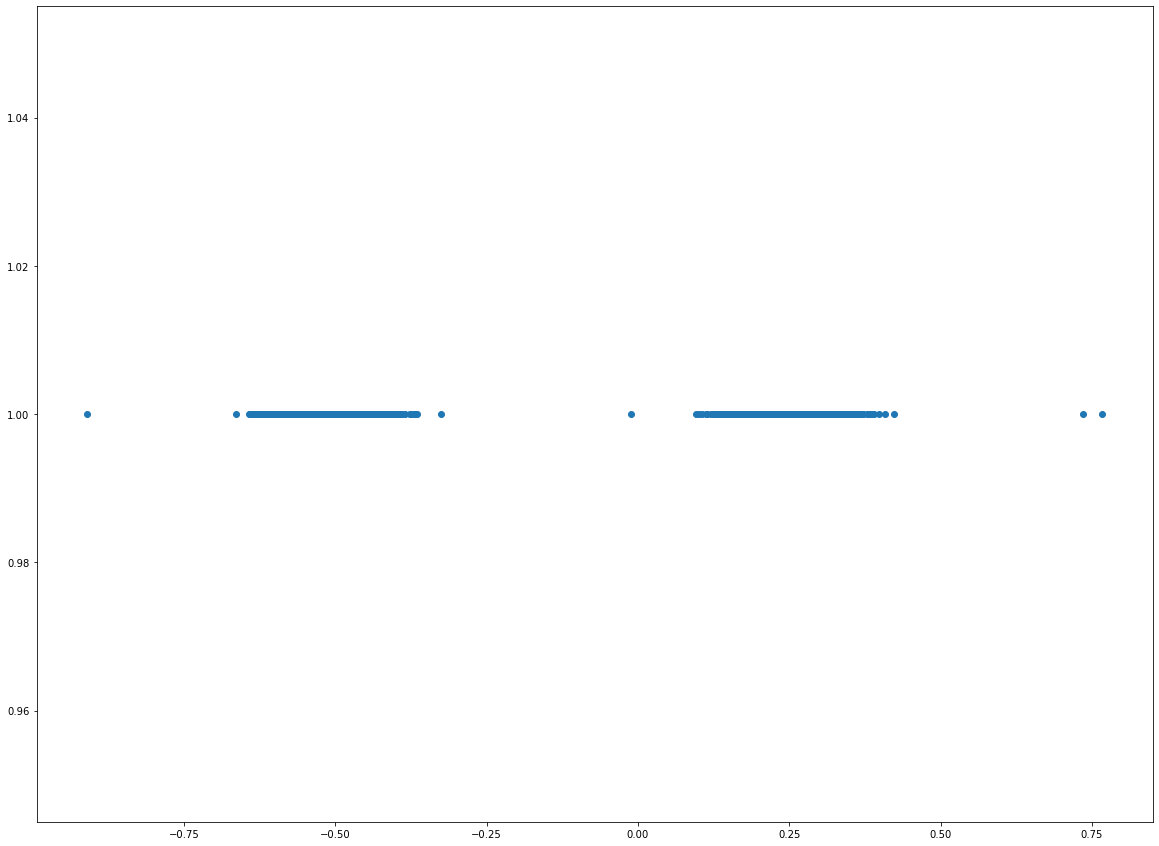

In [23]:
# With clustered scale transform
plt.scatter(m.transform(points_with_outliers), ([1] * (len(points_with_outliers))))

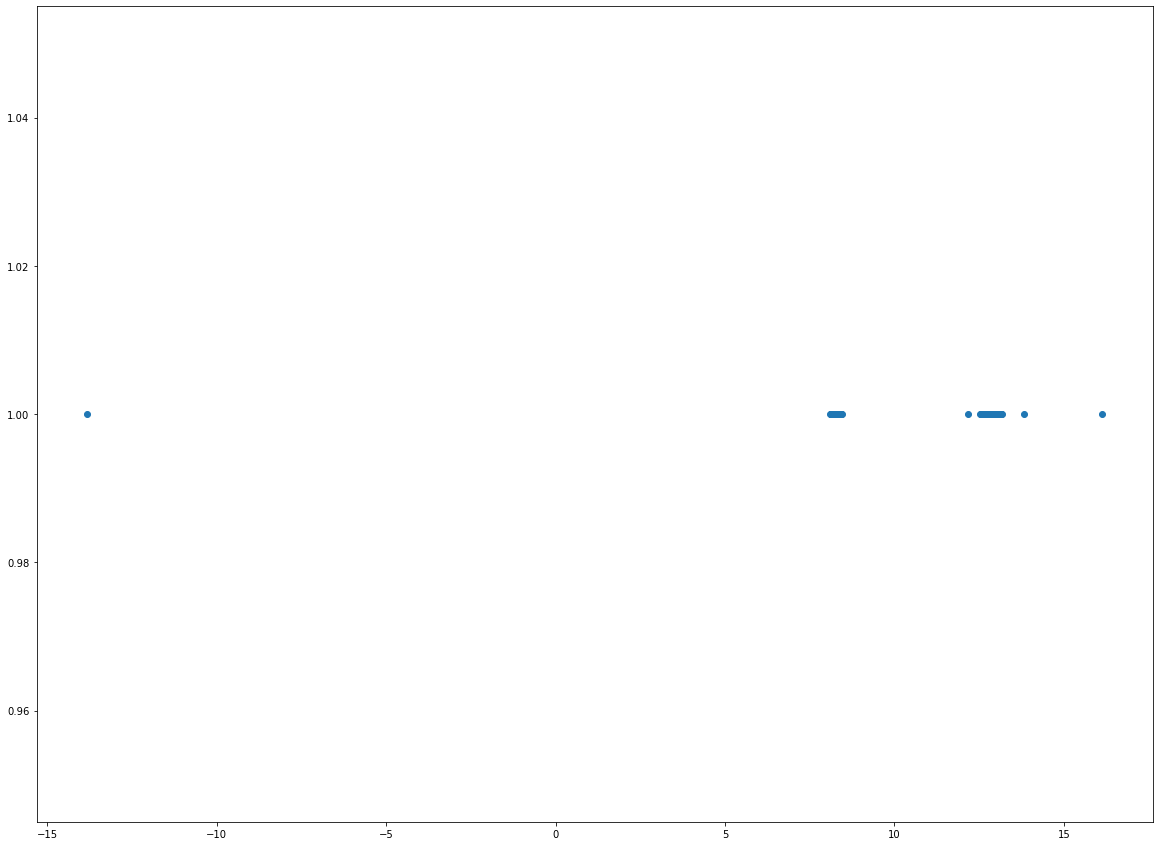

In [24]:
# With logarithmic transform
plt.scatter(
    [np.log(x + 1e-6) for x in points_with_outliers], [1] * len(points_with_outliers)
)

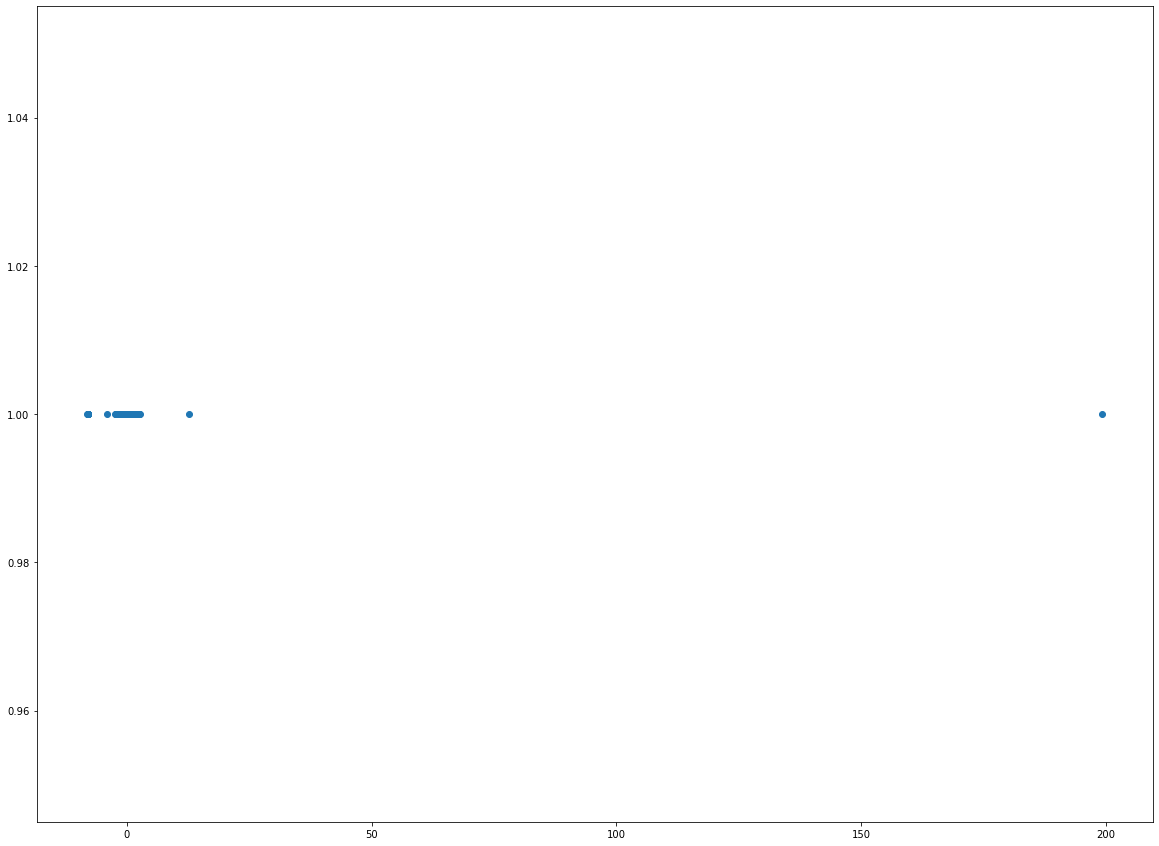

In [25]:
# With robust scaler
plt.scatter(robust_scaled_data.flatten(), [1] * len(points_with_outliers))

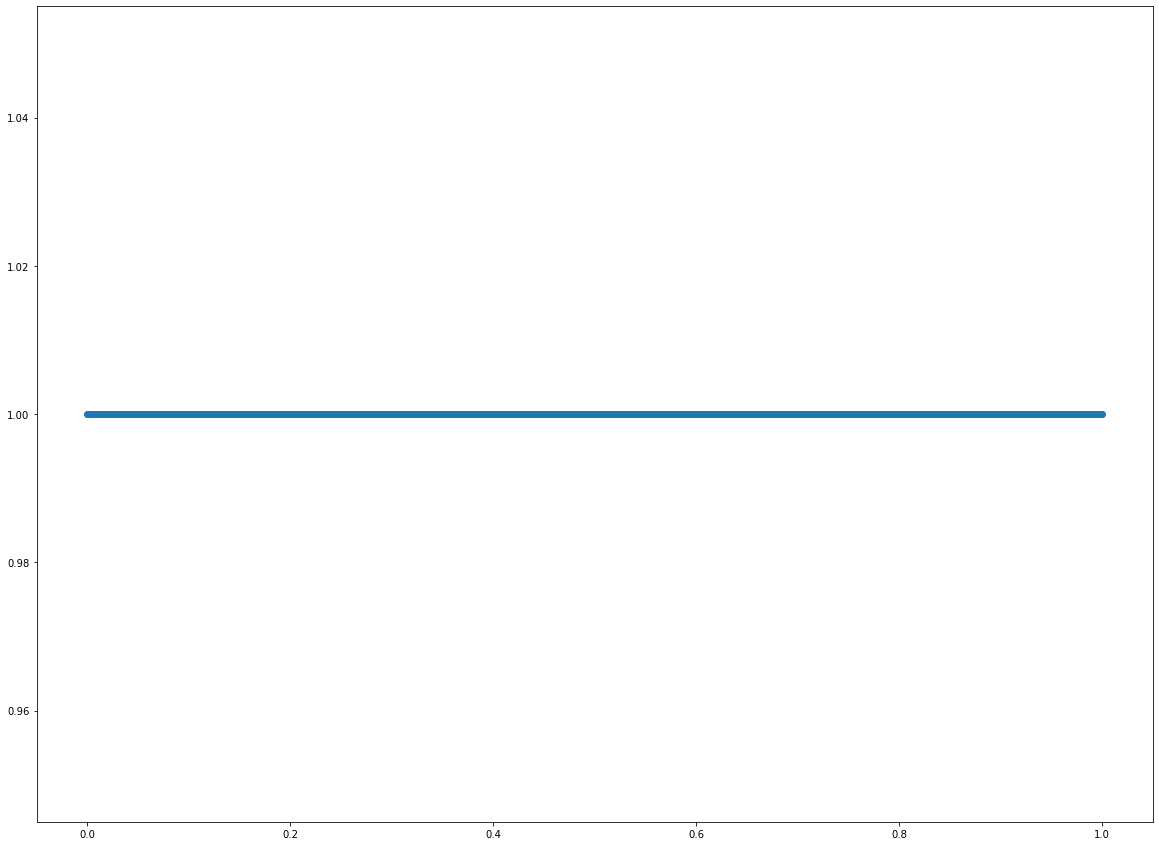

In [26]:
# With quantile transform
plt.scatter(quantile_scaled_data.flatten(), [1] * len(points_with_outliers))